Optical forces
=========================================

<span style="color: red;">**!!Attention!!**:</span> *linear.optical_force* is still beta functionality and is to be used with caution. 

*Author: Clément Majorel*  *(field gradients code also by C. Majorel)*


In this example, we calculate the optical force between two nano-cubes, trying to reproduce the physics reported by *Chaumet & Nieto-Vesperinas* [1].

First we load pyGDM, construct the geometry and setup the simulation.


[1]: Chaumet & Nieto-Vesperinas: *Coupled dipole method determination of the electromagnetic force on a particle over a flat dielectric substrate* **PRB** 61, 14119-14127 (2000) (https://journals.aps.org/prb/abstract/10.1103/PhysRevB.61.14119)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyGDM2 import fields
from pyGDM2 import tools
from pyGDM2 import structures
from pyGDM2 import propagators
from pyGDM2 import core
from pyGDM2 import linear
from pyGDM2 import visu
from pyGDM2 import materials



## -- global parameters
mesh = 'cube'
step = 33.


## -- simulations for several distances between nano-cubes
gap_list = np.linspace(0, 500, 100)
all_F = []
for gap in gap_list:
    
    ## -- create nanostructure of 2 cubes
    material = materials.dummy(n=2)
    
    geo1 = structures.rect_wire(step, L=5, H=5, W=5)
    
    geo2 = structures.rect_wire(step, L=5, H=5, W=5)
    geo2 = structures.shift(geo2, [0, 0, -1*(5*step+gap)])
    
    geo = structures.combine_geometries([geo1, geo2], step)
    
    struct = structures.struct(step, geo, material, verbose=False)
    
    
    ## -- incident field
    field_generator = fields.plane_wave
    kwargs = dict(E_p=1, inc_angle=0)   ## normal incidence, x-polarization
    wavelengths = [633.]
    efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)
    
    
    ## -- environment
    n1, n2, n3 = 1., 1., 1.
    dyads = propagators.DyadsQuasistatic123(n1, n2, n3, spacing=99999)
    
    
    ## -- simulation
    sim = core.simulation(struct, efield, dyads)
    #visu.structure(sim, show=1, projection='xz')
    print("Nr of dipoles: {}; distance: {}nm".format(len(geo), gap))
    
    ## -- run simulation
    core.scatter(sim, method='cupy')
    
    
    ## -- split one half of structure, calculated fields are kept
    sim_part1, sim_part2 = tools.split_simulation(sim, geo1)
    sim_subpart = sim_part1
    
    
    # =============================================================================
    # the actual calculation of the force on one of the cubes
    # following Eq. (6) from Chaumet & Nieto-Vesperinas, PRB 61, 14119–14127 (2000)
    # =============================================================================
    field_index = 0
    F_tot = linear.optical_force(sim_subpart, field_index)
    all_F.append(F_tot)
    

all_F = np.array(all_F)

Nr of dipoles: 250; distance: 0.0nm


/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


timing for wl=633.00nm - setup: EE 10844.1ms, inv.: 572.3ms, repropa.: 15622.4ms (1 field configs), tot: 27039.3ms


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/linear.py:1135: UserWarning: Optical force calculation is a beta-functionality and still under testing. Please use with caution.
  warnings.warn("Optical force calculation is a beta-functionality and still under testing. " +
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/linear.py:894: UserWarning: No H-values inside structure calculated. Setting internal magnetic field zero. Please run 'scatter' with the according parameter.
  warnings.warn("No H-values inside structure calculated. Setting internal magnetic field zero. " +


Nr of dipoles: 250; distance: 5.05050505050505nm
timing for wl=633.00nm - setup: EE 18.8ms, inv.: 6.6ms, repropa.: 17.5ms (1 field configs), tot: 43.2ms


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/linear.py:1135: UserWarning: Optical force calculation is a beta-functionality and still under testing. Please use with caution.
  warnings.warn("Optical force calculation is a beta-functionality and still under testing. " +


Nr of dipoles: 250; distance: 10.1010101010101nm
timing for wl=633.00nm - setup: EE 17.2ms, inv.: 3.8ms, repropa.: 13.7ms (1 field configs), tot: 34.8ms
Nr of dipoles: 250; distance: 15.15151515151515nm
timing for wl=633.00nm - setup: EE 15.9ms, inv.: 3.8ms, repropa.: 12.7ms (1 field configs), tot: 32.8ms
Nr of dipoles: 250; distance: 20.2020202020202nm
timing for wl=633.00nm - setup: EE 17.4ms, inv.: 4.2ms, repropa.: 12.9ms (1 field configs), tot: 34.7ms
Nr of dipoles: 250; distance: 25.252525252525253nm
timing for wl=633.00nm - setup: EE 15.5ms, inv.: 3.9ms, repropa.: 12.6ms (1 field configs), tot: 32.0ms
Nr of dipoles: 250; distance: 30.3030303030303nm
timing for wl=633.00nm - setup: EE 14.8ms, inv.: 4.0ms, repropa.: 13.6ms (1 field configs), tot: 32.6ms
Nr of dipoles: 250; distance: 35.35353535353535nm
timing for wl=633.00nm - setup: EE 14.7ms, inv.: 4.1ms, repropa.: 12.4ms (1 field configs), tot: 31.3ms
Nr of dipoles: 250; distance: 40.4040404040404nm
timing for wl=633.00nm - setu

Nr of dipoles: 250; distance: 282.8282828282828nm
timing for wl=633.00nm - setup: EE 14.8ms, inv.: 3.8ms, repropa.: 14.3ms (1 field configs), tot: 33.3ms
Nr of dipoles: 250; distance: 287.8787878787879nm
timing for wl=633.00nm - setup: EE 16.3ms, inv.: 3.8ms, repropa.: 13.3ms (1 field configs), tot: 33.5ms
Nr of dipoles: 250; distance: 292.9292929292929nm
timing for wl=633.00nm - setup: EE 15.4ms, inv.: 4.1ms, repropa.: 13.0ms (1 field configs), tot: 32.5ms
Nr of dipoles: 250; distance: 297.979797979798nm
timing for wl=633.00nm - setup: EE 22.2ms, inv.: 3.9ms, repropa.: 13.0ms (1 field configs), tot: 39.3ms
Nr of dipoles: 250; distance: 303.030303030303nm
timing for wl=633.00nm - setup: EE 17.8ms, inv.: 3.7ms, repropa.: 13.1ms (1 field configs), tot: 34.8ms
Nr of dipoles: 250; distance: 308.0808080808081nm
timing for wl=633.00nm - setup: EE 18.1ms, inv.: 3.8ms, repropa.: 13.3ms (1 field configs), tot: 35.4ms
Nr of dipoles: 250; distance: 313.1313131313131nm
timing for wl=633.00nm - set

plot the optical force
--------------------------------

Now we plot the z-component of the force as function of the inter-particle distance.
Note that the relative behvior of the force is the same as in reference [1].

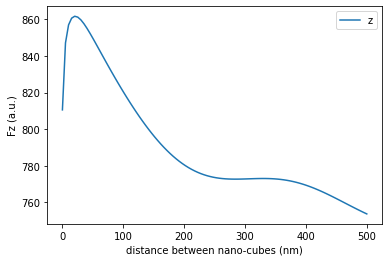

In [2]:
plt.plot(gap_list, all_F.T[2], label='z')
plt.legend()
plt.xlabel('distance between nano-cubes (nm)')
plt.ylabel('Fz (a.u.)')
plt.show()
